In [15]:
using Revise
using PyPlot
using JLD2
using LinearAlgebra
using FluidSolver

include("NACA.jl")

NACA (generic function with 1 method)

# Airfoil Design Problem


We consider the transonic flow over an airfoil, where the governing equation is Euler equation, as following, 

$$
\begin{align*}
\frac{\partial \rho^f}{\partial t} + \nabla \cdot (\rho^f \textbf{v}) = 0, \quad \quad
\frac{\partial \rho^f\textbf{u}}{\partial t} + \nabla \cdot (\rho^f \textbf{v} \otimes \textbf{v} + p \mathbb{I}) = 0, \quad \quad
\frac{\partial E}{\partial t} + \nabla \cdot  \Bigl( (E + p)\textbf{v} \Bigr) = 0 
\end{align*}
$$

where $\rho^f$ is the fluid density, $\textbf{v}$ is the velocity vector, $p$ is the pressure, and $E$ is the total energy. The viscous effect is ignored. The far-field boundary condition is 
$\rho_{\infty} = 1 , p_{\infty}  = 1.0 , M_{\infty} = 0.8 , AoA = 0$
where $M_{\infty}$ is the Mach number and $AoA$ is the angle of attack, and at the airfoil no-penetration condition is imposed. 
The shape parameterization of the airfoil follows the design element approach~\cite{farin2014curves}.
The initial NACA-0012 shape is mapped onto a 'cubic' design element with $8$ control nodes, and the initial shape is morphed to a different one following the displacement field of the control nodes of the design element. The displacements of control nodes are restrict to vertical direction only with prior $d\sim \mathbb{U}[-0.05, 0.05]$.
We generate $1000$ training data and $200$ test data with a second-order implicit finite volume solver. The C-grid mesh with about ($200 \times 50$) quadrilateral elements is used, and the mesh is adapted near the airfoil but not the shock.
It takes about $1$ CPU-hour for each simulation.
The mesh point locations and Mach number on these mesh points are used as input and output data. 

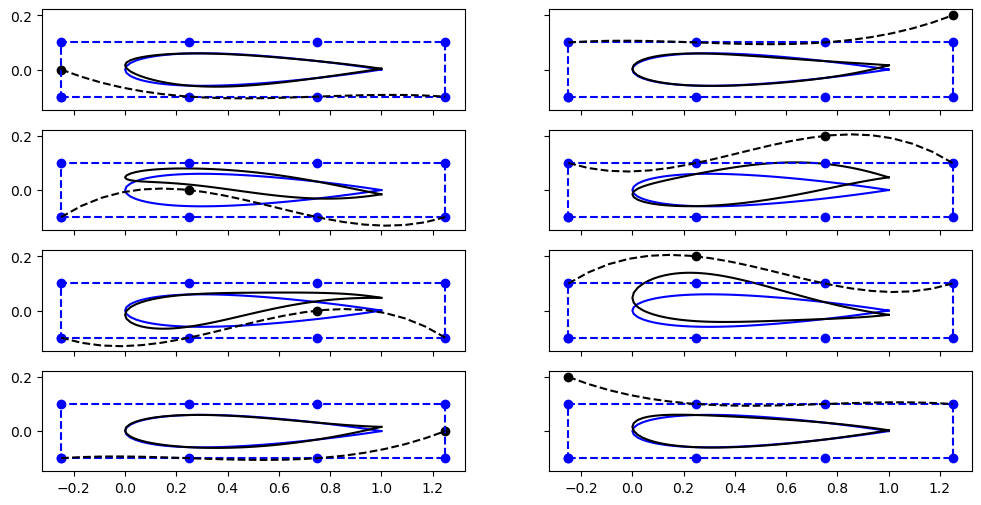

In [16]:
NACA_sdesign_demo()

┌ Info: [0.0, 0.02204350887971676, 0.0016907194475881057, 0.04949437221222748, -0.004332363381010895, -0.020630895584506804, 0.015153439441098121, -0.03979916184044196]
└ @ Main In[17]:5


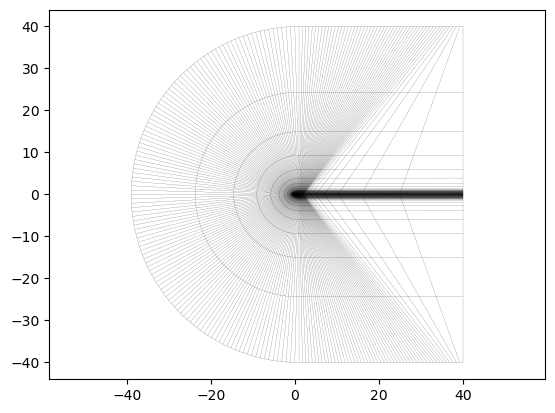

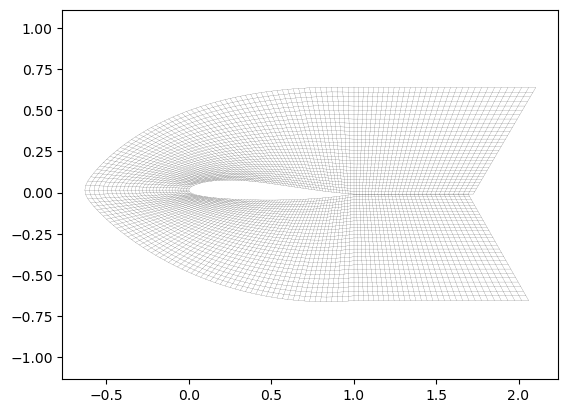

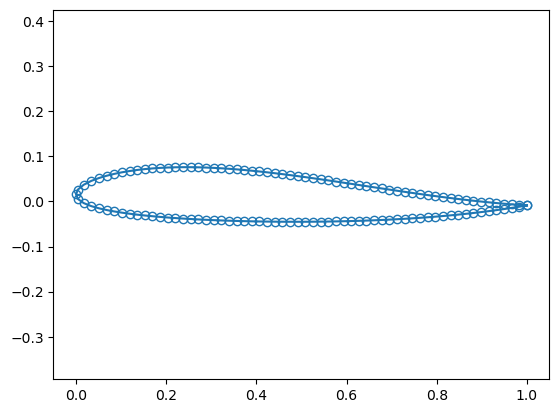

(-0.05, 1.05, -0.05116549483421885, 0.08201122948147217)

In [17]:
Random.seed!(3)
θ_field = rand(Uniform(-0.05, 0.05),8)
θ_field[1]= 0.0

@info θ_field
cnx1 = 50
cnx2 = 120
cny = 50

fig = figure()
xx_airfoil, yy_airfoil, xx_Cylinder, yy_Cylinder = Theta2Mesh(θ_field; cnx1 = cnx1, cnx2 = cnx2, cny = cny, R = 40, Rc = 1.0, L = 40, dy0 = 2.0/cnx2)
PlotCylinderGrid(xx_Cylinder, yy_Cylinder; equal_axis = true)

n = 30
fig = figure()
PlotCylinderGrid(xx_Cylinder[cnx1-n:end-cnx1+n,1:n], yy_Cylinder[cnx1-n:end-cnx1+n,1:n]; equal_axis = true)

fig = figure()
plot(xx_airfoil, yy_airfoil, "-o", fillstyle="none")
axis("equal")

In [18]:
solver, Q, residual, xx_Cylinder, yy_Cylinder, Q_Cylinder = NACA(θ_field; cnx1 = cnx1, cnx2 = cnx2, cny = cny, 
    R = 40, Rc = 1.0, L = 40, dy0 = 2.0/cnx2, cfl_init_number = 0.5,  cfl_max_number = 10.0, time_integrator = "BackwardEuler", eps1 = 1.0e-6, maxite = 2000);

("Residual = ", res, " Relative resiual = ", res / res0, "; ite/MAXITE = ", istep, "/", MAXITE) = ("Residual = ", 0.011771026471668049, " Relative resiual = ", 0.09553624593773903, "; ite/MAXITE = ", 200, "/", 2000)
("Residual = ", res, " Relative resiual = ", res / res0, "; ite/MAXITE = ", istep, "/", MAXITE) = ("Residual = ", 0.003938968530109564, " Relative resiual = ", 0.031969536993168866, "; ite/MAXITE = ", 400, "/", 2000)
("Residual = ", res, " Relative resiual = ", res / res0, "; ite/MAXITE = ", istep, "/", MAXITE) = ("Residual = ", 0.0016073584238618193, " Relative resiual = ", 0.013045675333563201, "; ite/MAXITE = ", 600, "/", 2000)
("Residual = ", res, " Relative resiual = ", res / res0, "; ite/MAXITE = ", istep, "/", MAXITE) = ("Residual = ", 0.000375132268660031, " Relative resiual = ", 0.0030446561957997256, "; ite/MAXITE = ", 800, "/", 2000)
("Residual = ", res, " Relative resiual = ", res / res0, "; ite/MAXITE = ", istep, "/", MAXITE) = ("Residual = ", 7.442656104188462

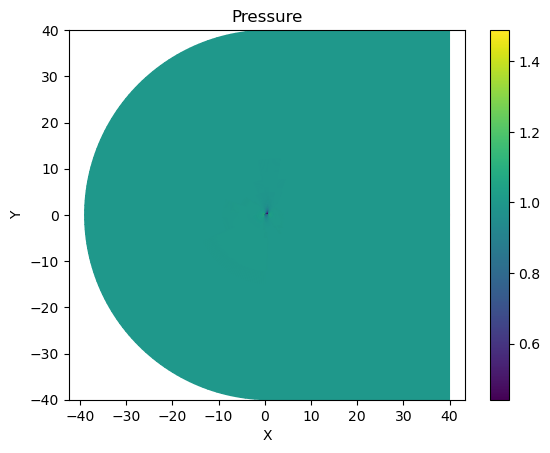

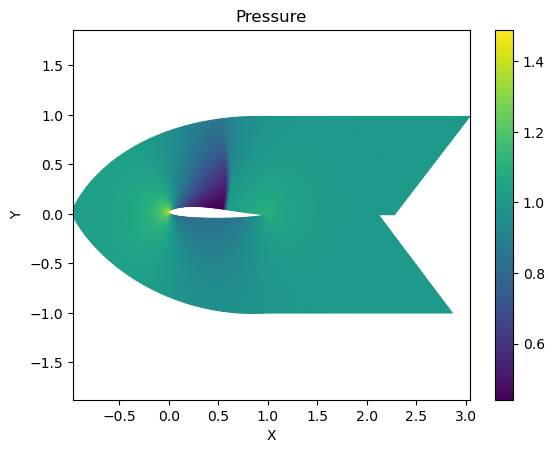

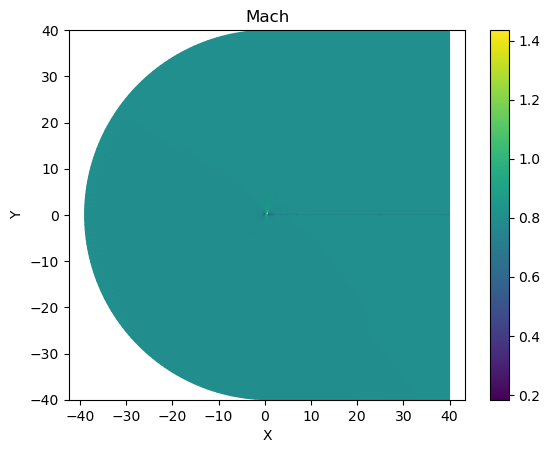

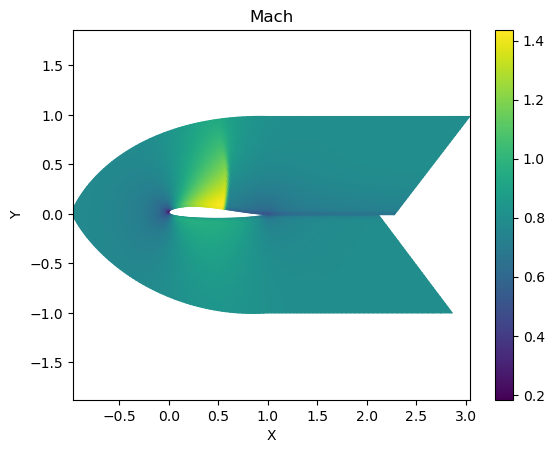

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc65d8a8fd0>

In [20]:
figure()
pcolormesh(xx_Cylinder, yy_Cylinder, Q_Cylinder[4, :, :], shading= "gouraud", cmap="viridis")
xlabel("X")
ylabel("Y")
title("Pressure")
axis("equal")
colorbar()


n = 40
figure()
pcolormesh(xx_Cylinder[cnx1-n:end-cnx1+n,1:n], yy_Cylinder[cnx1-n:end-cnx1+n,1:n], Q_Cylinder[4, cnx1-n:end-cnx1+n,1:n], shading= "gouraud", cmap="viridis")
xlabel("X")
ylabel("Y")
title("Pressure")
axis("equal")
colorbar()





figure()
pcolormesh(xx_Cylinder, yy_Cylinder, Q_Cylinder[5, :, :], shading= "gouraud", cmap="viridis")
xlabel("X")
ylabel("Y")
title("Mach")
axis("equal")
colorbar()


figure()
pcolormesh(xx_Cylinder[cnx1-n:end-cnx1+n,1:n], yy_Cylinder[cnx1-n:end-cnx1+n,1:n], Q_Cylinder[5, cnx1-n:end-cnx1+n,1:n], shading= "gouraud", cmap="viridis")
xlabel("X")
ylabel("Y")
title("Mach")
axis("equal")
colorbar()
